In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot  as  plt
import seaborn as sns
from sklearn.cluster import KMeans 

import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


In [3]:
df.shape

(200, 5)

In [4]:
# to see the first rows 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#to check if there is null values 
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# i chose Annual Income & Spending Score for clustreing 
X = df.iloc[: , [3,4]].values

In [7]:
# the optimal number of clustring #inertia_ is attribute of the fitted model to get the WCSS value
wcss = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++' , random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

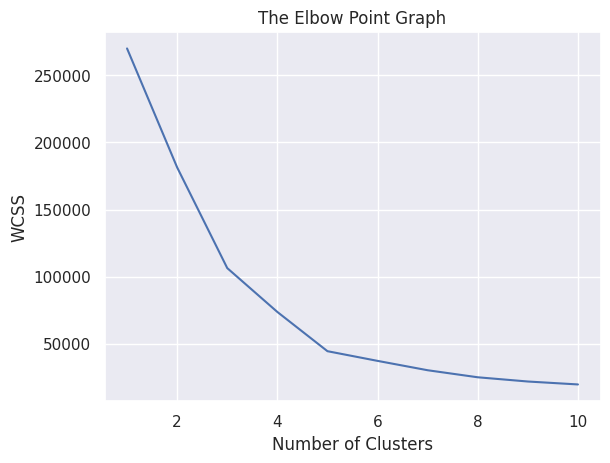

In [8]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# as you can see from the previous plot the optimal number of clustring is 5 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

    
# return name for each cluster 
Y= kmeans.fit_predict(X)

print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


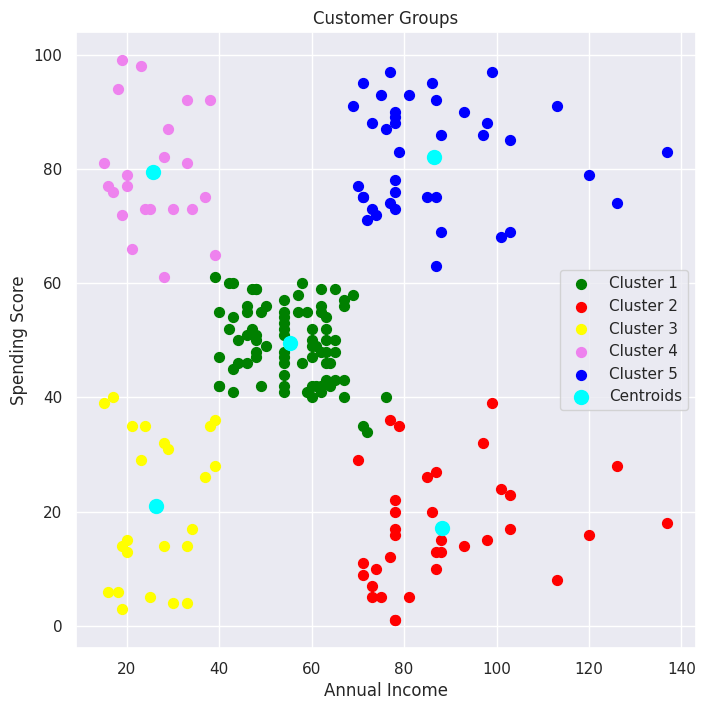

In [10]:
# Plotting all the clusters and their centroids
plt.figure(figsize=(8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='blue', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


# Cluster Profiling 

Cluster 1: Customers in this cluster have a balanced income and spending pattern. They manage their finances well and spend within their means.

Cluster 2: Further investigation is required for this group. Customers have high income but spend little. They may be saving for significant purchases or are not finding suitable products or services to spend on.

Cluster 3: Customers here have low income and don't spend much. They tend to save their money and are cautious with their spending.

Cluster 4: Customers in this cluster have low income but spend a lot. They might use credit cards or loans to support their spending habits.

Cluster 5: Similar to Cluster 2, customers in this group have high income but spend little. Understanding their spending behavior can help identify opportunities to offer products or services that meet their needs and preferences.